# <b>Import Libraries</b>

In [1]:
import pandas as pd
import mysql.connector as mysql

## Sambungkan Koneksi MySql

In [2]:
koneksi = mysql.connect(host="localhost",
                       database="dsc",
                       user="root",
                       password="")

In [3]:
cursor = koneksi.cursor()
cursor.execute("SELECT * FROM offices")

table_offices = cursor.fetchall()
table_offices

[('1',
  'San Francisco',
  '+1 650 219 4782',
  '100 Market Street',
  'Suite 300',
  'CA',
  'USA',
  '94080',
  'NA'),
 ('2',
  'Boston',
  '+1 215 837 0825',
  '1550 Court Place',
  'Suite 102',
  'MA',
  'USA',
  '02107',
  'NA'),
 ('3',
  'NYC',
  '+1 212 555 3000',
  '523 East 53rd Street',
  'apt. 5A',
  'NY',
  'USA',
  '10022',
  'NA'),
 ('4',
  'Paris',
  '+33 14 723 4404',
  "43 Rue Jouffroy D'abbans",
  None,
  None,
  'France',
  '75017',
  'EMEA'),
 ('5',
  'Tokyo',
  '+81 33 224 5000',
  '4-1 Kioicho',
  None,
  'Chiyoda-Ku',
  'Japan',
  '102-8578',
  'Japan'),
 ('6',
  'Sydney',
  '+61 2 9264 2451',
  '5-11 Wentworth Avenue',
  'Floor #2',
  None,
  'Australia',
  'NSW 2010',
  'APAC'),
 ('7',
  'London',
  '+44 20 7877 2041',
  '25 Old Broad Street',
  'Level 7',
  None,
  'UK',
  'EC2N 1HN',
  'EMEA')]

In [4]:
#_Bentuk DataFram
data_offices = pd.DataFrame(columns = ["ID", 
                                         "Kota", 
                                         "Nomor", 
                                         "Alamat1", 
                                         "Alamat2", 
                                         "Ibu Kota", 
                                         "Negara",
                                       "Kode Pos",
                                       "teritori"],
                             data = table_offices)
#_Ubah Index
data_offices = data_offices.set_index('ID')
data_offices

,Kota,Nomor,Alamat1,Alamat2,Ibu Kota,Negara,Kode Pos,teritori
ID,,,,,,,,
1,San Francisco,+1 650 219 4782,100 Market Street,Suite 300,CA,USA,94080,NA
2,Boston,+1 215 837 0825,1550 Court Place,Suite 102,MA,USA,02107,NA
3,NYC,+1 212 555 3000,523 East 53rd Street,apt. 5A,NY,USA,10022,NA
4,Paris,+33 14 723 4404,43 Rue Jouffroy D'abbans,None,None,France,75017,EMEA
5,Tokyo,+81 33 224 5000,4-1 Kioicho,None,Chiyoda-Ku,Japan,102-8578,Japan
6,Sydney,+61 2 9264 2451,5-11 Wentworth Avenue,Floor #2,None,Australia,NSW 2010,APAC
7,London,+44 20 7877 2041,25 Old Broad Street,Level 7,None,UK,EC2N 1HN,EMEA


# Create

In [5]:
cursor = koneksi.cursor()
sql = "INSERT INTO offices VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
data = ('8', 'Sidoarjo', '+621 81251', 'Sedati Agung', 'Rt 05', 'Jakarta', 'Indonesia', '61253', 'Republik')
cursor.execute(sql, data)
koneksi.commit()

# Read

In [6]:
cursor.execute("SELECT * FROM offices")
office = cursor.fetchall()
office

[('1',
  'San Francisco',
  '+1 650 219 4782',
  '100 Market Street',
  'Suite 300',
  'CA',
  'USA',
  '94080',
  'NA'),
 ('2',
  'Boston',
  '+1 215 837 0825',
  '1550 Court Place',
  'Suite 102',
  'MA',
  'USA',
  '02107',
  'NA'),
 ('3',
  'NYC',
  '+1 212 555 3000',
  '523 East 53rd Street',
  'apt. 5A',
  'NY',
  'USA',
  '10022',
  'NA'),
 ('4',
  'Paris',
  '+33 14 723 4404',
  "43 Rue Jouffroy D'abbans",
  None,
  None,
  'France',
  '75017',
  'EMEA'),
 ('5',
  'Tokyo',
  '+81 33 224 5000',
  '4-1 Kioicho',
  None,
  'Chiyoda-Ku',
  'Japan',
  '102-8578',
  'Japan'),
 ('6',
  'Sydney',
  '+61 2 9264 2451',
  '5-11 Wentworth Avenue',
  'Floor #2',
  None,
  'Australia',
  'NSW 2010',
  'APAC'),
 ('7',
  'London',
  '+44 20 7877 2041',
  '25 Old Broad Street',
  'Level 7',
  None,
  'UK',
  'EC2N 1HN',
  'EMEA'),
 ('8',
  'Sidoarjo',
  '+621 81251',
  'Sedati Agung',
  'Rt 05',
  'Jakarta',
  'Indonesia',
  '61253',
  'Republik')]

# Update

In [9]:
# update
cursor = koneksi.cursor()
sql = "UPDATE offices SET postalCode = '12345' WHERE city = 'Sidoarjo'"
cursor.execute(sql)
koneksi.commit()

# Delete

In [13]:
cursor = koneksi.cursor()
sql = "DELETE FROM offices WHERE state = 'Jakarta'"
cursor.execute(sql)
koneksi.commit()

# Join

Studi Kasus:
Saya ingin mengetahui sales yang melakukan penjualan paling banyak

In [14]:
cursor.execute("SELECT c.customerNumber, c.customerName, p.paymentDate, p.amount, \
        e.employeeNumber, CONCAT(e.firstName, ' ', e.lastName) as nama, e.email, e.jobTitle \
        FROM customers c  \
        INNER JOIN employees e ON e.employeeNumber = c.salesRepEmployeeNumber \
        INNER JOIN payments p ON p.customerNumber = c.customerNumber")
tbl_employee = cursor.fetchall()
dt = pd.DataFrame(columns=["Kode Cust", "Nama Cust", "Tanggal Bayar", "Jumlah Bayar","Kode Pegawai",  "Nama Pegawai", "Email", "Pekerjaan"], data=tbl_employee)
dt.head(10)

,Kode Cust,Nama Cust,Tanggal Bayar,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan
0,124,Mini Gifts Distributors Ltd.,2005-03-05,101244.59,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
1,124,Mini Gifts Distributors Ltd.,2004-08-28,85410.87,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
2,124,Mini Gifts Distributors Ltd.,2003-04-11,11044.30,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
3,124,Mini Gifts Distributors Ltd.,2005-04-16,83598.04,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
4,124,Mini Gifts Distributors Ltd.,2004-12-27,47142.70,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
5,124,Mini Gifts Distributors Ltd.,2004-11-02,55639.66,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
6,124,Mini Gifts Distributors Ltd.,2003-08-15,111654.40,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
7,124,Mini Gifts Distributors Ltd.,2004-03-26,43369.30,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
8,124,Mini Gifts Distributors Ltd.,2003-11-25,45084.38,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
9,129,Mini Wheels Co.,2004-12-08,26248.78,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep


# Preprocessing

Membersihkan data yang memiliki nilai yang kosong/hilang

In [15]:
import numpy as np
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Kode Cust      273 non-null    int64 
 1   Nama Cust      273 non-null    object
 2   Tanggal Bayar  273 non-null    object
 3   Jumlah Bayar   273 non-null    object
 4   Kode Pegawai   273 non-null    int64 
 5   Nama Pegawai   273 non-null    object
 6   Email          273 non-null    object
 7   Pekerjaan      273 non-null    object
dtypes: int64(2), object(6)
memory usage: 10.7+ KB


In [16]:
dt.isnull().sum()

Kode Cust        0
Nama Cust        0
Tanggal Bayar    0
Jumlah Bayar     0
Kode Pegawai     0
Nama Pegawai     0
Email            0
Pekerjaan        0
dtype: int64

Mendeteksi outlier pada data

In [17]:
dt["Nama Cust"].value_counts()

Euro+ Shopping Channel                13
Mini Gifts Distributors Ltd.           9
Danish Wholesale Imports               4
Muscle Machine Inc                     4
Down Under Souveniers, Inc             4
                                      ..
Australian Collectables, Ltd           2
Collectable Mini Designs Co.           1
The Sharp Gifts Warehouse              1
Bavarian Collectables Imports, Co.     1
King Kong Collectables, Co.            1
Name: Nama Cust, Length: 98, dtype: int64

In [18]:
dt["Tanggal Bayar"].value_counts()

2003-11-18    3
2003-12-09    3
2004-06-21    3
2003-11-24    3
2003-12-07    2
             ..
2003-10-28    1
2004-07-03    1
2004-09-30    1
2004-09-07    1
2005-01-29    1
Name: Tanggal Bayar, Length: 232, dtype: int64

In [19]:
dt['Kode Pegawai'].value_counts()

1370    29
1401    27
1504    21
1501    21
1165    21
1323    20
1337    19
1286    17
1611    16
1216    15
1188    14
1621    14
1612    14
1166    13
1702    12
Name: Kode Pegawai, dtype: int64

In [20]:
dt['Nama Pegawai'].value_counts()

Gerard Hernandez    29
Pamela Castillo     27
Larry Bott          21
Barry Jones         21
Leslie Jennings     21
George Vanauf       20
Loui Bondur         19
Foon Yue Tseng      17
Andy Fixter         16
Steve Patterson     15
Julie Firrelli      14
Mami Nishi          14
Peter Marsh         14
Leslie Thompson     13
Martin Gerard       12
Name: Nama Pegawai, dtype: int64

In [21]:
dt['Pekerjaan'].value_counts() # ada 3 data beda, harusnya sama

Sales Rep    192
sls rep       48
sale rep      33
Name: Pekerjaan, dtype: int64

In [22]:
dt['Pekerjaan'] = dt['Pekerjaan'].replace(["sls rep","sale rep"],"Sales Rep")
dt['Pekerjaan'].value_counts()

Sales Rep    273
Name: Pekerjaan, dtype: int64

In [23]:
# convert Jumlah Bayar to float
dt["Jumlah Bayar"] = dt['Jumlah Bayar'].astype(float)

# convert Kode ke string
dt['Kode Cust'] = dt['Kode Cust'].astype('str')
dt['Kode Pegawai'] = dt['Kode Pegawai'].astype('str')

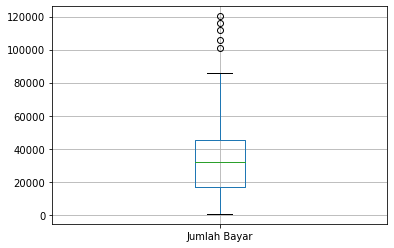

In [24]:
dt.boxplot(["Jumlah Bayar"])

In [25]:
dt.describe()

,Jumlah Bayar
count,273.000000
mean,32431.645531
std,20997.116917
min,615.450000
25%,16909.840000
50%,32077.440000
75%,45352.470000
max,120166.580000


In [26]:
dt._get_numeric_data()

,Jumlah Bayar
0,101244.59
1,85410.87
2,11044.30
3,83598.04
4,47142.70
...,...
268,33145.56
269,22162.61
270,57131.92
271,3474.66


In [27]:
from scipy import stats

hasil_zscore = np.abs(stats.zscore(dt._get_numeric_data()))
print(hasil_zscore)

[[3.28327566]
 [2.52780054]
 [1.02045555]
 [2.44130488]
 [0.70190932]
 [1.10732522]
 [3.77995947]
 [0.52186889]
 [0.60370059]
 [0.29500339]
 [0.40592908]
 [0.75834151]
 [1.43126732]
 [0.87372164]
 [0.94182968]
 [0.2978957 ]
 [2.534874  ]
 [0.684683  ]
 [1.29396532]
 [0.11616008]
 [0.94750324]
 [0.87031116]
 [0.0100357 ]
 [0.04371634]
 [1.36228808]
 [0.854593  ]
 [0.34109844]
 [1.38267157]
 [1.33433348]
 [2.28753526]
 [0.54287699]
 [0.5715616 ]
 [1.18106007]
 [0.17361942]
 [0.98232566]
 [0.57620218]
 [0.8932463 ]
 [1.33631119]
 [1.15104713]
 [0.40962154]
 [0.95983606]
 [0.43412129]
 [0.10375845]
 [0.19604413]
 [0.01186454]
 [0.94954393]
 [1.28030794]
 [1.24793707]
 [0.12980214]
 [1.47554927]
 [1.08656484]
 [1.25937103]
 [1.26788303]
 [0.71472648]
 [0.51064391]
 [0.66597572]
 [0.82886569]
 [0.87639548]
 [1.05960268]
 [1.09711988]
 [0.10200457]
 [1.07133913]
 [0.75979336]
 [1.25780599]
 [0.57814887]
 [1.26008762]
 [0.35942169]
 [0.46898522]
 [1.28524009]
 [0.57107059]
 [0.16037624]
 [0.45

In [28]:
hasil_zscore.shape

(273, 1)

In [29]:
outlier = dt[(hasil_zscore > 3).all(axis=1)]
print(outlier.shape)

(5, 8)


In [30]:
outlier

,Kode Cust,Nama Cust,Tanggal Bayar,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan
0,124,Mini Gifts Distributors Ltd.,2005-03-05,101244.59,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
6,124,Mini Gifts Distributors Ltd.,2003-08-15,111654.40,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
129,141,Euro+ Shopping Channel,2004-12-31,116208.40,1370,Gerard Hernandez,ghernande@classicmodelcars.com,Sales Rep
131,141,Euro+ Shopping Channel,2005-03-18,120166.58,1370,Gerard Hernandez,ghernande@classicmodelcars.com,Sales Rep
249,148,"Dragon Souveniers, Ltd.",2003-12-26,105743.00,1621,Mami Nishi,mnishi@classicmodelcars.com,Sales Rep


In [31]:
import seaborn as sns
sns.set(style="whitegrid")

In [32]:
dt_2 = pd.DataFrame([])

dt_2["Keterangan"] = ["Tidak ada outlier","Outlier"]
dt_2["Jumlah Observasi"] = [273, 5]

dt_2

,Keterangan,Jumlah Observasi
0,Tidak ada outlier,273
1,Outlier,5


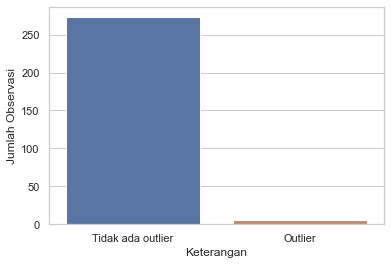

In [33]:
plot=sns.barplot(x="Keterangan",y="Jumlah Observasi",data=dt_2)

Melakukan normalisasi nilai pada data

In [34]:
from sklearn import preprocessing

In [35]:
# min-max normalization
dt["Jumlah Bayar"] = (dt["Jumlah Bayar"] - dt["Jumlah Bayar"].min()) / (dt["Jumlah Bayar"].max() - dt["Jumlah Bayar"].min())
dt.head(10)

,Kode Cust,Nama Cust,Tanggal Bayar,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan
0,124,Mini Gifts Distributors Ltd.,2005-03-05,0.841725,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
1,124,Mini Gifts Distributors Ltd.,2004-08-28,0.709282,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
2,124,Mini Gifts Distributors Ltd.,2003-04-11,0.087233,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
3,124,Mini Gifts Distributors Ltd.,2005-04-16,0.694118,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
4,124,Mini Gifts Distributors Ltd.,2004-12-27,0.389183,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
5,124,Mini Gifts Distributors Ltd.,2004-11-02,0.460257,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
6,124,Mini Gifts Distributors Ltd.,2003-08-15,0.928799,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
7,124,Mini Gifts Distributors Ltd.,2004-03-26,0.357620,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
8,124,Mini Gifts Distributors Ltd.,2003-11-25,0.371966,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep
9,129,Mini Wheels Co.,2004-12-08,0.214413,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep


Melakukan transformasi data (label encoding, scalling, binning)

In [37]:
# split tanggal ke kolom tahun, bulan, hari
import dateutil
dt['Tanggal Bayar'] = dt['Tanggal Bayar'].astype('str')
dt["Tanggal Bayar"] = dt["Tanggal Bayar"].apply(lambda x: dateutil.parser.parse(x))
sp = dt['Tanggal Bayar']
dt['Tahun'] = sp.dt.year
dt['Bulan'] = sp.dt.month
dt['Hari'] = sp.dt.day
dt = dt.drop(columns=['Tanggal Bayar'])
dt.head(10)

,Kode Cust,Nama Cust,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Email,Pekerjaan,Tahun,Bulan,Hari
0,124,Mini Gifts Distributors Ltd.,0.841725,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2005,3,5
1,124,Mini Gifts Distributors Ltd.,0.709282,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,8,28
2,124,Mini Gifts Distributors Ltd.,0.087233,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2003,4,11
3,124,Mini Gifts Distributors Ltd.,0.694118,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2005,4,16
4,124,Mini Gifts Distributors Ltd.,0.389183,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,12,27
5,124,Mini Gifts Distributors Ltd.,0.460257,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,11,2
6,124,Mini Gifts Distributors Ltd.,0.928799,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2003,8,15
7,124,Mini Gifts Distributors Ltd.,0.357620,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,3,26
8,124,Mini Gifts Distributors Ltd.,0.371966,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2003,11,25
9,129,Mini Wheels Co.,0.214413,1165,Leslie Jennings,ljennings@classicmodelcars.com,Sales Rep,2004,12,8


In [38]:
# remove kolom email & pekerjaan -> karena sudah tahu itu sales semua
dt = dt.drop(columns=['Email', 'Pekerjaan'])
dt.head(5)

,Kode Cust,Nama Cust,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Tahun,Bulan,Hari
0,124,Mini Gifts Distributors Ltd.,0.841725,1165,Leslie Jennings,2005,3,5
1,124,Mini Gifts Distributors Ltd.,0.709282,1165,Leslie Jennings,2004,8,28
2,124,Mini Gifts Distributors Ltd.,0.087233,1165,Leslie Jennings,2003,4,11
3,124,Mini Gifts Distributors Ltd.,0.694118,1165,Leslie Jennings,2005,4,16
4,124,Mini Gifts Distributors Ltd.,0.389183,1165,Leslie Jennings,2004,12,27


In [39]:
# gabungkan namacust & kode, begitu pula dg pegawai
dt['Cust'] = dt['Kode Cust'] + '_' + dt['Nama Cust']
dt['Pegawai'] = dt['Kode Pegawai'] + '_' + dt['Nama Pegawai']
dt.head(5)

,Kode Cust,Nama Cust,Jumlah Bayar,Kode Pegawai,Nama Pegawai,Tahun,Bulan,Hari,Cust,Pegawai
0,124,Mini Gifts Distributors Ltd.,0.841725,1165,Leslie Jennings,2005,3,5,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
1,124,Mini Gifts Distributors Ltd.,0.709282,1165,Leslie Jennings,2004,8,28,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
2,124,Mini Gifts Distributors Ltd.,0.087233,1165,Leslie Jennings,2003,4,11,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
3,124,Mini Gifts Distributors Ltd.,0.694118,1165,Leslie Jennings,2005,4,16,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
4,124,Mini Gifts Distributors Ltd.,0.389183,1165,Leslie Jennings,2004,12,27,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings


In [40]:
# remove kolom kodeCust,NamaCust,KodePegawai,NamaPegawai -> karena sudah digabung
dt = dt.drop(columns=['Kode Cust', 'Nama Cust', "Kode Pegawai", "Nama Pegawai"])
dt.head(5)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai
0,0.841725,2005,3,5,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
1,0.709282,2004,8,28,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
2,0.087233,2003,4,11,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
3,0.694118,2005,4,16,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings
4,0.389183,2004,12,27,124_Mini Gifts Distributors Ltd.,1165_Leslie Jennings


In [41]:
# label encoding & scaling
kategori = ["Cust",
            "Pegawai"]

le = preprocessing.LabelEncoder()
for feature in kategori:
    if feature in dt.columns.values:
        dt[feature] = le.fit_transform(dt[feature])
dt.head(5)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai
0,0.841725,2005,3,5,5,0
1,0.709282,2004,8,28,5,0
2,0.087233,2003,4,11,5,0
3,0.694118,2005,4,16,5,0
4,0.389183,2004,12,27,5,0


In [42]:
dt.dtypes

Jumlah Bayar    float64
Tahun             int64
Bulan             int64
Hari              int64
Cust              int32
Pegawai           int32
dtype: object

In [43]:
# bins -> membagi kategori nominal transaksi pembeli -> (Kecil, Normal, Agak Besar, Besar)
dt['Jumlah Bayar'].value_counts(bins=4, sort=False)

(-0.002, 0.25]    131
(0.25, 0.5]       125
(0.5, 0.75]        12
(0.75, 1.0]         5
Name: Jumlah Bayar, dtype: int64

In [44]:
cut_labels = ['Kecil', 'Normal', 'Agak Besar', 'Besar']
cut_bins = [-0, 0.25, 0.5, 0.75, 1.0]
dt['Kategori Transaksi'] = pd.cut(dt['Jumlah Bayar'], bins=cut_bins, labels=cut_labels)
dt.head(10)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai,Kategori Transaksi
0,0.841725,2005,3,5,5,0,Besar
1,0.709282,2004,8,28,5,0,Agak Besar
2,0.087233,2003,4,11,5,0,Kecil
3,0.694118,2005,4,16,5,0,Agak Besar
4,0.389183,2004,12,27,5,0,Normal
5,0.460257,2004,11,2,5,0,Normal
6,0.928799,2003,8,15,5,0,Besar
7,0.357620,2004,3,26,5,0,Normal
8,0.371966,2003,11,25,5,0,Normal
9,0.214413,2004,12,8,7,0,Kecil


Feature selection

In [46]:
# Menurut saya tidak perlu pakai feature selection, karena semua data dibutuhkan untuk visualisasi

Visualisasi Data

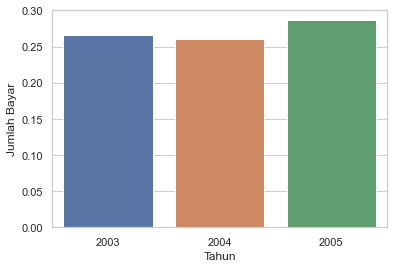

In [47]:
# tahun berapa penjualan terbanyak?
sns.set(style="whitegrid")
sns.barplot(x="Tahun",y="Jumlah Bayar",data=dt, ci=None)

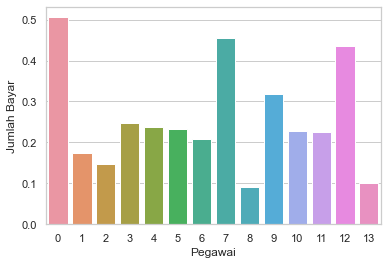

In [48]:
# siapa sales yg berhasil menjual paling banyak di tahun itu?
ds = dt[dt['Tahun'] == 2005]
sns.set(style="whitegrid")
sns.barplot(x="Pegawai",y="Jumlah Bayar",data=ds, ci=None)

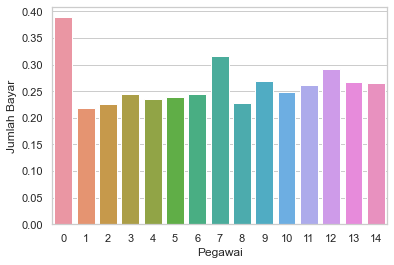

In [49]:
# siapa sales yg berhasil menjual paling banyak di semua tahun?
sns.set(style="whitegrid")
sns.barplot(x="Pegawai",y="Jumlah Bayar",data=dt, ci=None)

In [50]:
# list pegawai
mapping = dict(zip(le.classes_, range(0, len(le.classes_))))
print(mapping)

{'1165_Leslie Jennings': 0, '1166_Leslie Thompson': 1, '1188_Julie Firrelli': 2, '1216_Steve Patterson': 3, '1286_Foon Yue Tseng': 4, '1323_George Vanauf': 5, '1337_Loui Bondur': 6, '1370_Gerard Hernandez': 7, '1401_Pamela Castillo': 8, '1501_Larry Bott': 9, '1504_Barry Jones': 10, '1611_Andy Fixter': 11, '1612_Peter Marsh': 12, '1621_Mami Nishi': 13, '1702_Martin Gerard': 14}


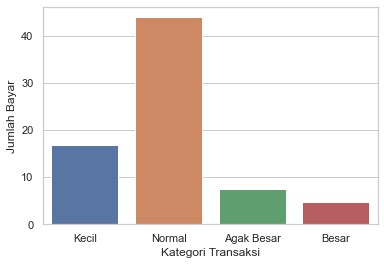

In [51]:
# jumlah kategori transaksi?
gt = dt.groupby(['Kategori Transaksi'])['Jumlah Bayar'].sum().reset_index()
sns.set(style="whitegrid")
sns.barplot(x="Kategori Transaksi",y="Jumlah Bayar",data=gt, ci=None)

## Membuat tabel pada database

In [53]:
# Jumlah Bayar	Tahun	Bulan	Hari	Cust	Pegawai	Kategori Transaksi
cursor.execute("CREATE TABLE IF NOT EXISTS hasil_processing "+
              "(jml_bayar FLOAT NULL, "+
              "tahun INT(10) NULL, " +
              "bulan INT(10) NULL, " +
              "hari INT(10) NULL, " +
              "cust INT(10) NULL, " +
              "pegawai INT(10) NULL, " +
              "kategori VARCHAR(30) NULL)")

for baris in dt.values:
    sql_query = "INSERT INTO hasil_processing VALUES (%s, %s, %s, %s, %s, %s, %s)"
    cursor.execute(sql_query, tuple(baris))
    print(baris, "Telah dimasukkan")
    koneksi.commit()

[0.8417247080809692 2005 3 5 5 0 'Besar'] Telah dimasukkan
[0.7092816270327181 2004 8 28 5 0 'Agak Besar'] Telah dimasukkan
[0.08723338708718184 2003 4 11 5 0 'Kecil'] Telah dimasukkan
[0.6941179895162848 2005 4 16 5 0 'Agak Besar'] Telah dimasukkan
[0.38918285423149074 2004 12 27 5 0 'Normal'] Telah dimasukkan
[0.46025671191899237 2004 11 2 5 0 'Normal'] Telah dimasukkan
[0.9287988327672018 2003 8 15 5 0 'Besar'] Telah dimasukkan
[0.35761978995932536 2004 3 26 5 0 'Normal'] Telah dimasukkan
[0.37196578568517086 2003 11 25 5 0 'Normal'] Telah dimasukkan
[0.21441311345195982 2004 12 8 7 0 'Kecil'] Telah dimasukkan
[0.19496662223100691 2003 12 11 7 0 'Kecil'] Telah dimasukkan
[0.13318485571821861 2003 4 9 7 0 'Kecil'] Telah dimasukkan
[0.015213574309167968 2004 11 14 16 0 'Kecil'] Telah dimasukkan
[0.41930343945724313 2003 11 18 16 0 'Normal'] Telah dimasukkan
[0.10101736386766064 2005 2 2 16 0 'Kecil'] Telah dimasukkan
[0.31835483278158894 2003 8 5 16 0 'Normal'] Telah dimasukkan
[0.710

[0.4462003830494952 2003 2 20 11 8 'Normal'] Telah dimasukkan
[0.29735402751943874 2003 10 31 37 8 'Normal'] Telah dimasukkan
[0.4444114413640423 2004 11 2 37 8 'Normal'] Telah dimasukkan
[0.2786154342497641 2004 9 19 42 8 'Normal'] Telah dimasukkan
[0.3988547828866193 2004 9 4 42 8 'Normal'] Telah dimasukkan
[0.3098142192382456 2004 12 5 48 8 'Normal'] Telah dimasukkan
[0.43108216542997124 2003 3 2 48 8 'Normal'] Telah dimasukkan
[0.3103972333845778 2003 11 24 48 8 'Normal'] Telah dimasukkan
[0.3742082571699657 2004 8 9 54 8 'Normal'] Telah dimasukkan
[0.13622564671701556 2004 3 3 54 8 'Kecil'] Telah dimasukkan
[0.09590934021284449 2004 12 3 72 8 'Kecil'] Telah dimasukkan
[0.008465917469788867 2003 4 19 72 8 'Kecil'] Telah dimasukkan
[0.11513441989214153 2005 2 3 72 8 'Kecil'] Telah dimasukkan
[0.004288959878505539 2003 8 22 72 8 'Kecil'] Telah dimasukkan
[0.2945256979168662 2003 5 12 73 8 'Normal'] Telah dimasukkan
[0.048551527701996625 2004 8 1 73 8 'Kecil'] Telah dimasukkan
[0.3529

ProgrammingError: 1054 (42S22): Unknown column 'nan' in 'field list'

## Export to File

In [54]:
from pandas import DataFrame, read_csv
dt.to_csv("data_hasil_ekspor.csv", index=False)

In [55]:
data_ekspor = read_csv("data_hasil_ekspor.csv")
data_ekspor.head(10)

,Jumlah Bayar,Tahun,Bulan,Hari,Cust,Pegawai,Kategori Transaksi
0,0.841725,2005,3,5,5,0,Besar
1,0.709282,2004,8,28,5,0,Agak Besar
2,0.087233,2003,4,11,5,0,Kecil
3,0.694118,2005,4,16,5,0,Agak Besar
4,0.389183,2004,12,27,5,0,Normal
5,0.460257,2004,11,2,5,0,Normal
6,0.928799,2003,8,15,5,0,Besar
7,0.357620,2004,3,26,5,0,Normal
8,0.371966,2003,11,25,5,0,Normal
9,0.214413,2004,12,8,7,0,Kecil
